# Task_3 Canny Edge Detection

### DEPENDENCIES

In [1]:
# Understand a multi-stage edge detection process.

import cv2
import numpy as np
import matplotlib.pyplot as plt

## Noise reduction using Gaussian blur.

(<Axes: title={'center': 'gray_Blur'}>,
 Text(0.5, 1.0, 'gray_Blur'))

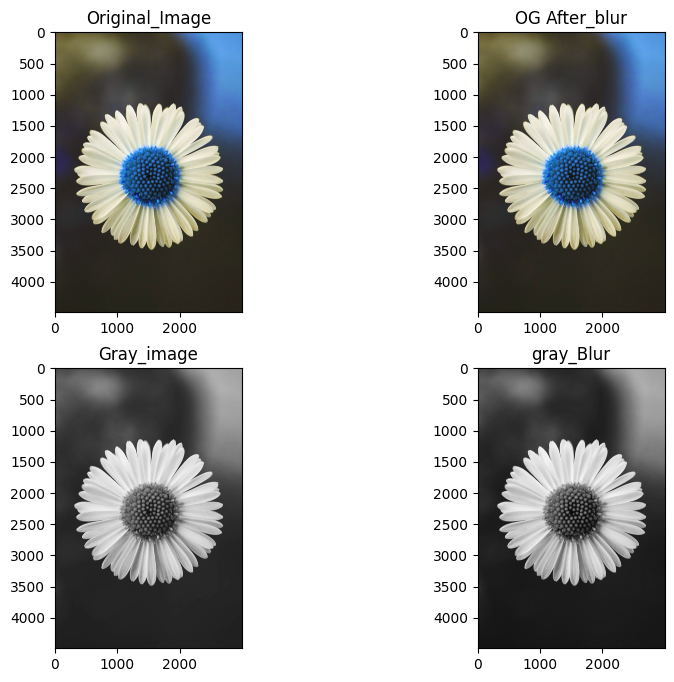

In [2]:
img = cv2.imread('flower.jpeg')

blur_imag = cv2.GaussianBlur(img,(5,5),1.4)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray,(5,5),1.4)

plt.figure(figsize=(10, 8)) 
plt.subplot(2,2,1), plt.imshow(img), plt.title("Original_Image")

plt.subplot(2,2,2), plt.imshow(blur_imag), plt.title("OG After_blur")

plt.subplot(2,2,3), plt.imshow(gray,cmap='gray'), plt.title("Gray_image")

plt.subplot(2,2,4), plt.imshow(blur, cmap='gray' ), plt.title("gray_Blur")

## Gradient computation (similar to Sobel).

True

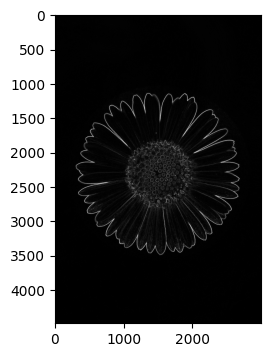

In [3]:
x_sobel = cv2.Sobel(blur,cv2.CV_64F,1,0,ksize = 3)
y_sobel = cv2.Sobel(blur,cv2.CV_64F,0,1,ksize = 3)

magnitude = np.sqrt(x_sobel**2 + y_sobel**2)

sobel = np.uint8(np.clip(magnitude, 0, 255))

plt.figure(figsize=(4,4))
plt.imshow(sobel,cmap = 'gray')
cv2.imwrite("sobel.png",sobel)


### cv2.Canny Do
### 1.Gradient Computation (Sobel)	
### 2.Non-Maximum Suppression
### 3.Double Thresholding (Hysteresis)	
### 4.Edge Tracking by Hysteresis

## Apply Canny with different threshold values and observe changes.

(<Axes: title={'center': 'high'}>,
 Text(0.5, 1.0, 'high'))

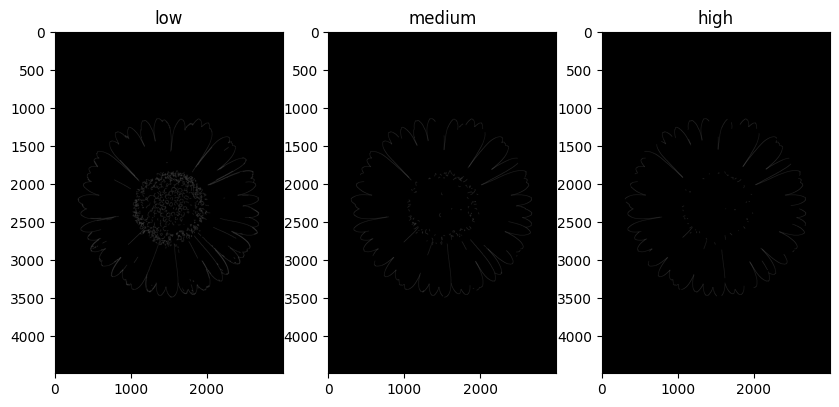

In [4]:
edges_low = cv2.Canny(blur, 50, 100)     # detects more edges (sensitive)
edges_medium = cv2.Canny(blur, 100, 200) # balanced
edges_high = cv2.Canny(blur, 150, 250)   # detects fewer edges

plt.figure(figsize=(10,8))

plt.subplot(1,3,1), plt.imshow(edges_low , cmap= 'gray') , plt.title('low')
plt.subplot(1,3,2), plt.imshow(edges_medium , cmap = 'gray') , plt.title('medium')
plt.subplot(1,3,3), plt.imshow(edges_high ,  cmap = 'gray') , plt.title('high')

In [5]:
edges_high.max()

np.uint8(255)

## compare sobel and canny edge detection


(<Axes: title={'center': 'Canny'}>,
 Text(0.5, 1.0, 'Canny'))

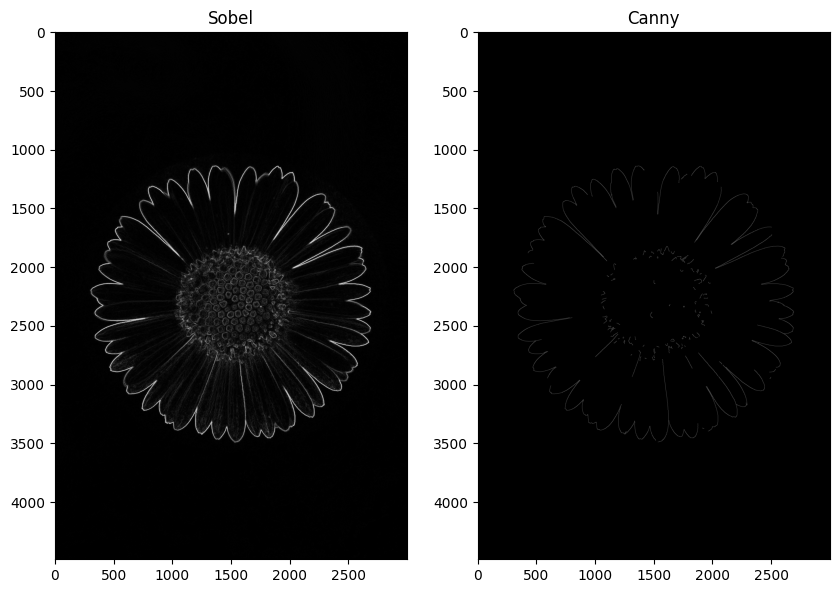

In [7]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1),plt.imshow(sobel,cmap = 'gray'),plt.title('Sobel')
plt.subplot(1,2,2), plt.imshow(edges_medium , cmap = 'gray') , plt.title('Canny')


## Test on noisy vs. denoised images.

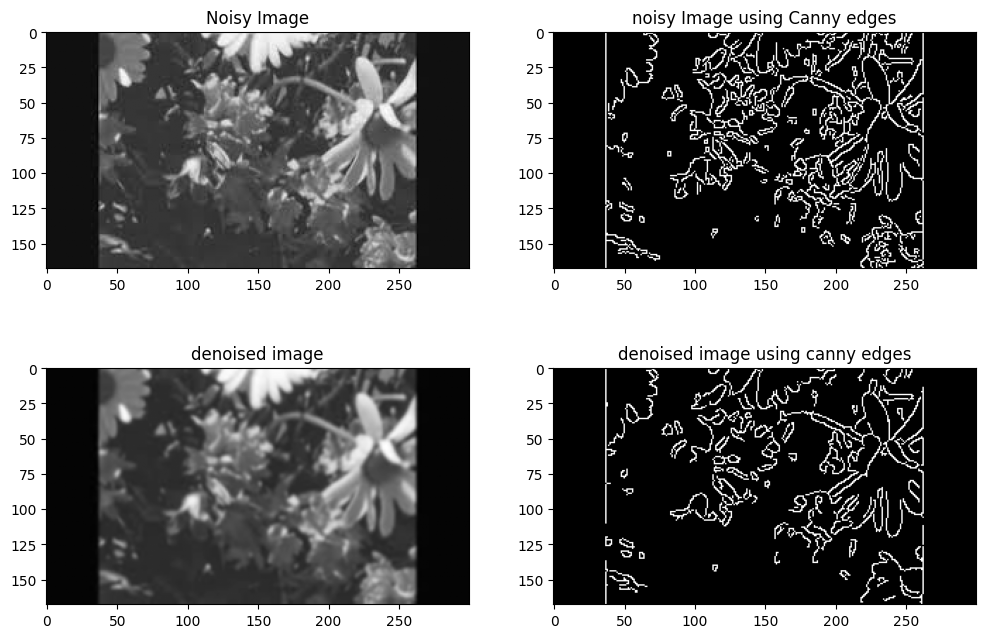

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the noisy image (grayscale)
img = cv2.imread('noisy.jpeg', cv2.IMREAD_GRAYSCALE)


denoised_gaussian = cv2.GaussianBlur(img, (5,5), 1)


# Apply Canny edge detection
edges_original = cv2.Canny(img, 100, 200)
edges = cv2.Canny(denoised_gaussian, 100, 200)


# Show results
plt.figure(figsize=(12,8))
plt.subplot(2,2,1); plt.imshow(img, cmap='gray'); plt.title("Noisy Image")
plt.subplot(2,2,2); plt.imshow(edges_original, cmap='gray'); plt.title("noisy Image using Canny edges")
plt.subplot(2,2,3); plt.imshow(denoised_gaussian, cmap='gray'); plt.title("denoised image")
plt.subplot(2,2,4); plt.imshow(edges, cmap='gray'); plt.title("denoised image using canny edges")


plt.show()

# Try detecting object boundaries (like a coin or a shape).


### Shapes

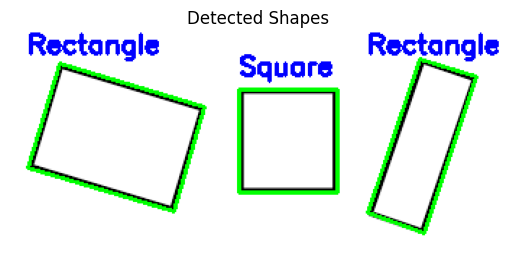

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("shapes.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


for contour in contours:
    area = cv2.contourArea(contour)
    if area < 100:  # skip noise
        continue

    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    x, y, w, h = cv2.boundingRect(approx)

    perimeter = cv2.arcLength(contour, True)
    circularity = 4 * np.pi * (area / (perimeter * perimeter)) if perimeter != 0 else 0

    if len(approx) == 3:
        label = "Triangle"
    elif len(approx) == 4:
        aspect_ratio = w / float(h)
        label = "Square" if 0.95 < aspect_ratio < 1.05 else "Rectangle"
    elif len(approx) > 4:
        label = "Circle" if 0.7 < circularity < 1.3 else "object"
    else:
        label = "object"

    cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)
    cv2.putText(image, label, (x, max(15, y - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# Display using Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title("Detected Shapes")
plt.axis("off")
plt.show()

### COIN

threshold value: 250.0


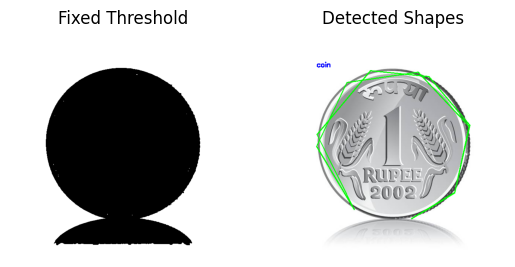

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("coin.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)
ret, otsu_thresh = cv2.threshold(blurred, 250,255, cv2.THRESH_BINARY)
edges = cv2.Canny(otsu_thresh, 50, 150)

print("threshold value:", ret)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


for contour in contours:
    area = cv2.contourArea(contour)
    if area < 100:  # skip noise
        continue

    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    x, y, w, h = cv2.boundingRect(approx)

    perimeter = cv2.arcLength(contour, True)
    circularity = 4 * np.pi * (area / (perimeter * perimeter)) if perimeter != 0 else 0

    if len(approx) == 3:
        label = "Triangle"
    elif len(approx) == 4:
        aspect_ratio = w / float(h)
        label = "Square" if 0.95 < aspect_ratio < 1.05 else "Rectangle"
    elif len(approx) > 4:
        label = "Circle" if 0.7 < circularity < 1.3 else "coin"
    else:
        label = "object"

    cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)
    cv2.putText(image, label, (x, max(15, y - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# Display using Matplotlib
plt.subplot(1, 2, 1)
plt.imshow(otsu_thresh, cmap="gray")
plt.title("Fixed Threshold")   
plt.axis("off")

plt.subplot(1, 2, 2)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title("Detected Shapes")
plt.axis("off")
plt.show()